In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
os.chdir('/fast/groups/ag_kircher/work/MisLa/MisLaReview')

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import os
#os.chdir('/fast/work/groups/ag_kircher/ReMM/MA_Lusi/Snakemake')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 300)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

### CADD

In [ ]:
import pandas as pd
# KDN,FKDN,RkDN,PD,MCS,IH,RFD
# regHGMD_LR-Ce-01-wmo-a.tsv ClinVar-full-ExAc_LR-Ce-01-wmo-a
test = 'regHGMD_LR-Ce-01-wmo-a'
models = ['entireSet','sampleSet','sampleCADDRFD','sampleCADDPD','sampleCADDMCS',
          'PUAll', 'PUSample','sampleCADDFKDN', 'sampleCADDIH','sampleCADDKDN']

models = ['CADDIter0']
for mod in models:
    print(mod)
    df = pd.read_csv('data/test/results/'+mod+'/tests/'+test+'.tsv',sep = '\t')
    display(df)

for mod in models:
    print(mod)
    df = pd.read_csv('output/'+mod+'_results.txt',sep = '\t')
    display(df)

In [ ]:
import json
with open('configs/params.json') as f:
    data = json.load(f)


### MisLa

In [4]:
#cv = pd.read_csv('../allCVs.csv', sep = '\t', index_col = 'Unnamed: 0')
#allScores = pd.read_csv('../allScores.csv', sep = '\t', index_col = 'Unnamed: 0')

COLS = ["Index","True Positive","False Positive", "True Negative", "False Negative", "Execution Time","Precision","Recall",
"F-score","N"] #	NoiseInd	FoundNoiseInd	Time




noiseLevels = [0.05, 0.1, 0.2, 0.3, 0.4,  0.5, 0.6, 0.7]
datasetSizes = [100,300,500,1000,3000,5000,10000],
noiseType = ["Sym","Asym","Real"]
noiseType = ["Sym"]

datasets = ["Adult","DryBean","Chess","Magic","Iris","ClinVarArt", "ClinVarReal","Encode", "RNA0", "RNA1", "RNA2"]

datasets = ["Adult","DryBean","Chess","Magic","ClinVarArt", "ClinVarReal","EncodeArt", "EncodeReal"]
imps = ['Python','R','CleanLab']
models = ["KDN", "FKDN", "RkDN", "PD", "MCS", "IH", "RFD"]
dfs = pd.DataFrame()
for imp in imps:
    #print(imp)
    for name in datasets[:]:

       # print(name)
        file='output/'+name+'_'+imp+'.csv'
       # print(file)
        df_raw = pd.read_csv(file, sep = '\t',header = None)
        df = df_raw.copy()

        #display(df.head())

        df[0] = df[0].str.replace('\'','')
        df.columns = COLS

        ind = df[df['True Positive']=='failed'].index
        df = df.drop(ind)

        cols = ['Dataset','Model','NoiseLevel','NoiseType','DatasetSize', 'Sample']
        df[cols] = df['Index'].str.replace(' ','').str.split('\[|]|,',expand= True).iloc[:,1:-1]
        df[['NoiseLevel','DatasetSize']] = df[['NoiseLevel','DatasetSize']].astype(float)
       
        df['DatasetSize'] = df['DatasetSize'].astype(int)
        dfs = dfs.append(df)

## delete 0.0 Noise since precision and recall are not defined
dfs.shape


(34186, 16)

In [6]:
dfs.shape
mod = pd.read_csv('figures/models.txt',sep = '\t')
groups = ['Similarity','Ensemble','Single']
drop = ['saturationFilter', 'classifSF', 'DROP1', 'DROP2',
                                 'DROP3', 'EWF', 'TomekLinks','consensusSF','INFFC','ModeFilter', 'ENG']
mod = mod[~mod['Abbreviation'].isin(drop)]
#for group in groups:   
    #print(mod[mod['Group']==group]['Abbreviation'])
print(mod[mod['Package'].isin(['NoiseFiltersR'])]['Abbreviation'].to_list())


['C45votingFilter', 'ORBoostFilter', 'CVCF', 'C45iteratedVotingFilter', 'IPF', 'CNN', 'C45robustFilter', 'HARF', 'BBNR', 'PRISM', 'PF', 'hybridRepairFilter', 'dynamicCF', 'EF', 'GE', 'edgeBoostFilter', 'AENN', 'RNN']


In [ ]:
df = pd.DataFrame(dfs['Model'].value_counts().reset_index())
df[['Name','Group','Author']]=''

df['Model']='NoiseFiltersR'
df.loc[df['index'].isin(["KDN", "FKDN", "RkDN", "PD", "MCS", "IH", "RFD"]),'Model']='Scikit-Clean'

df.loc[df['index']=='CleanLab','Model']='CleanLab'
df[['Name','Group','Author']]=''
df.columns= ['Abbreviation','Implementation','Full name','Group','Author']
df.to_csv("figures/models.csv",sep = '\t',index = False)


In [ ]:
Dataset='Adult'
NoiseType = 'Sym'
Models = ['PD','hybridRepairFilter']
dfs[(dfs['Dataset']==Dataset)&(dfs['NoiseType']==NoiseType)&(dfs['Model'].isin(Models))]

267
266


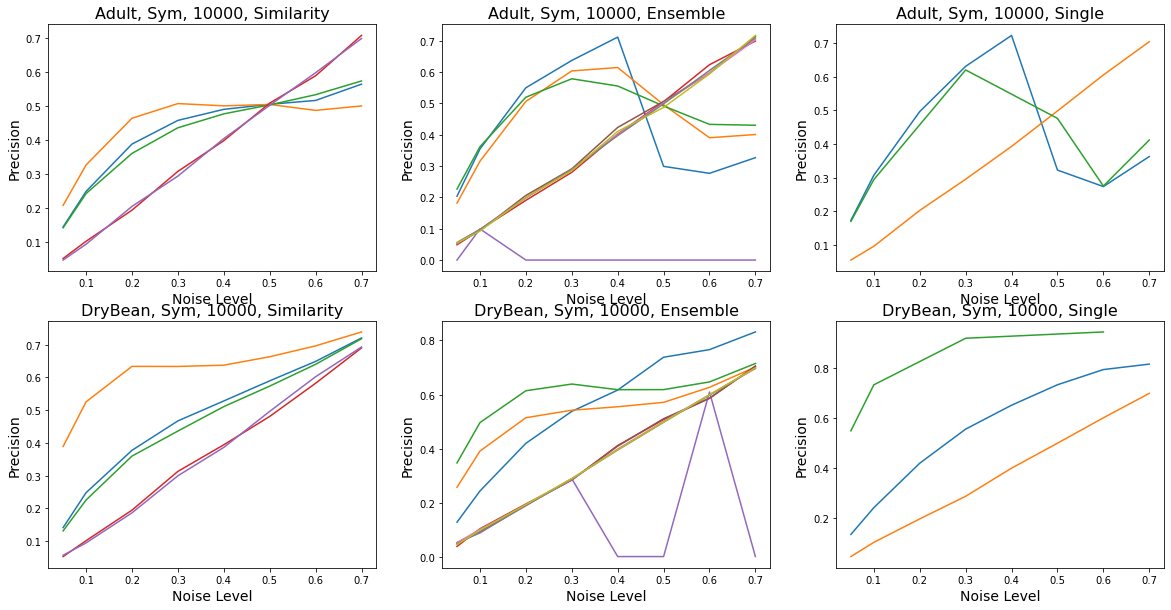

In [14]:
models = ["FKDN"]
models = ["KDN", "FKDN", "RkDN", "PD", "MCS", "IH", "RFD","CleanLab"]
models = ['C45votingFilter', 'CVCF', 'C45iteratedVotingFilter', 'IPF', 'CNN',
       'C45robustFilter', 'HARF', 'BBNR', 'ORBoostFilter', 'PRISM',
       'TomekLinks', 'PF', 'hybridRepairFilter', 'dynamicCF', 'EF', 'DROP1',
       'GE', 'DROP3', 'DROP2', 'edgeBoostFilter', 'INFFC', 'classifSF', 'AENN',
       'consensusSF', 'RNN', 'ModeFilter', 'ENG', 'saturationFilter', 'EWF']

#models = ['PD', 'MCS', 'IH', 'RkDN', 'FKDN', 'RFD', 'KDN', 'C45votingFilter', 
#'ORBoostFilter', 'CVCF', 'C45iteratedVotingFilter', 'IPF', 'CNN', 'C45robustFilter', 
#'HARF', 'BBNR']
NoiseTypes = ["Sym","Asym","Real"]
NoiseTypes = ["Sym"]
#NoiseType=''
variable = 'NoiseLevel'
#constant = ''
Score = 'Precision'
NoiseLevel = ''
allScores = dfs
DatasetSize = 10000

datasets = ["Adult","DryBean","Chess","Magic","ClinVarArt"]
n = len(datasets)
n = 2
#fig, axs = plt.subplots(n,3,figsize=(2.3*n*2,4.0*n*2))
fig, axs = plt.subplots(n,3,figsize=(20,10))

for j,Dataset in enumerate(datasets[:n]):

    scores = allScores[((allScores['Dataset'].str.contains(Dataset)) 
              # &(allScores['NoiseType'].str.contains(NoiseType)) 
              # &(allScores['Score'].str.contains(Score))
                &(allScores['DatasetSize']==DatasetSize))
              #  &(allScores['DatasetSize'].astype(str).str.len()==len(str(DatasetSize)))
            #  &(allScores['NoiseLevel'].astype(str).str.contains(str(NoiseLevel)))
                   ]
    print(len(scores))
    #fig, axs = plt.subplots(1,3,figsize=(16,4))

    for noiseType in NoiseTypes:
        for i,group in enumerate(groups):  
            #print(i)
            models = mod[mod['Group']==group]['Abbreviation']
                #plt.figure(figsize=(8,5))
            for model in models[:]:

                table = scores[scores['Model'] == model]
                table = table[table['NoiseType'] == noiseType]
                
                if len(table) > 0:
                    table = table.sort_values([variable])
                    table = pd.DataFrame(table.groupby('Index').mean())
                axs[j,i].plot(table[variable],table[Score].astype(float),  label = model)
              #  plt.plot(table[variable],table[Score].astype(float),  label = model)
             #   plt.legend()
             #   plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

                axs[j,i].set_title("{}, {}, {}, {}".format(Dataset,noiseType,str(DatasetSize), group), fontsize = 16 )
            #  plt.title("Dataset: {}, noise type: {}, group: {}".format(Dataset,noiseType,\
            #                                      group), fontsize = 16 )
                axs[j,i].set_xlabel('Noise Level',fontsize = 14 )


                axs[j,i].set_ylabel(Score,fontsize = 14 )
                #plt.savefig('figures/'+Dataset+Score+noiseType+'.png',transparent=True)
        plt.savefig('figures/test.png',transparent=False,bbox_inches = 'tight'
                  #  ,pad_inches = 0
                   )


134
133
134
134
135


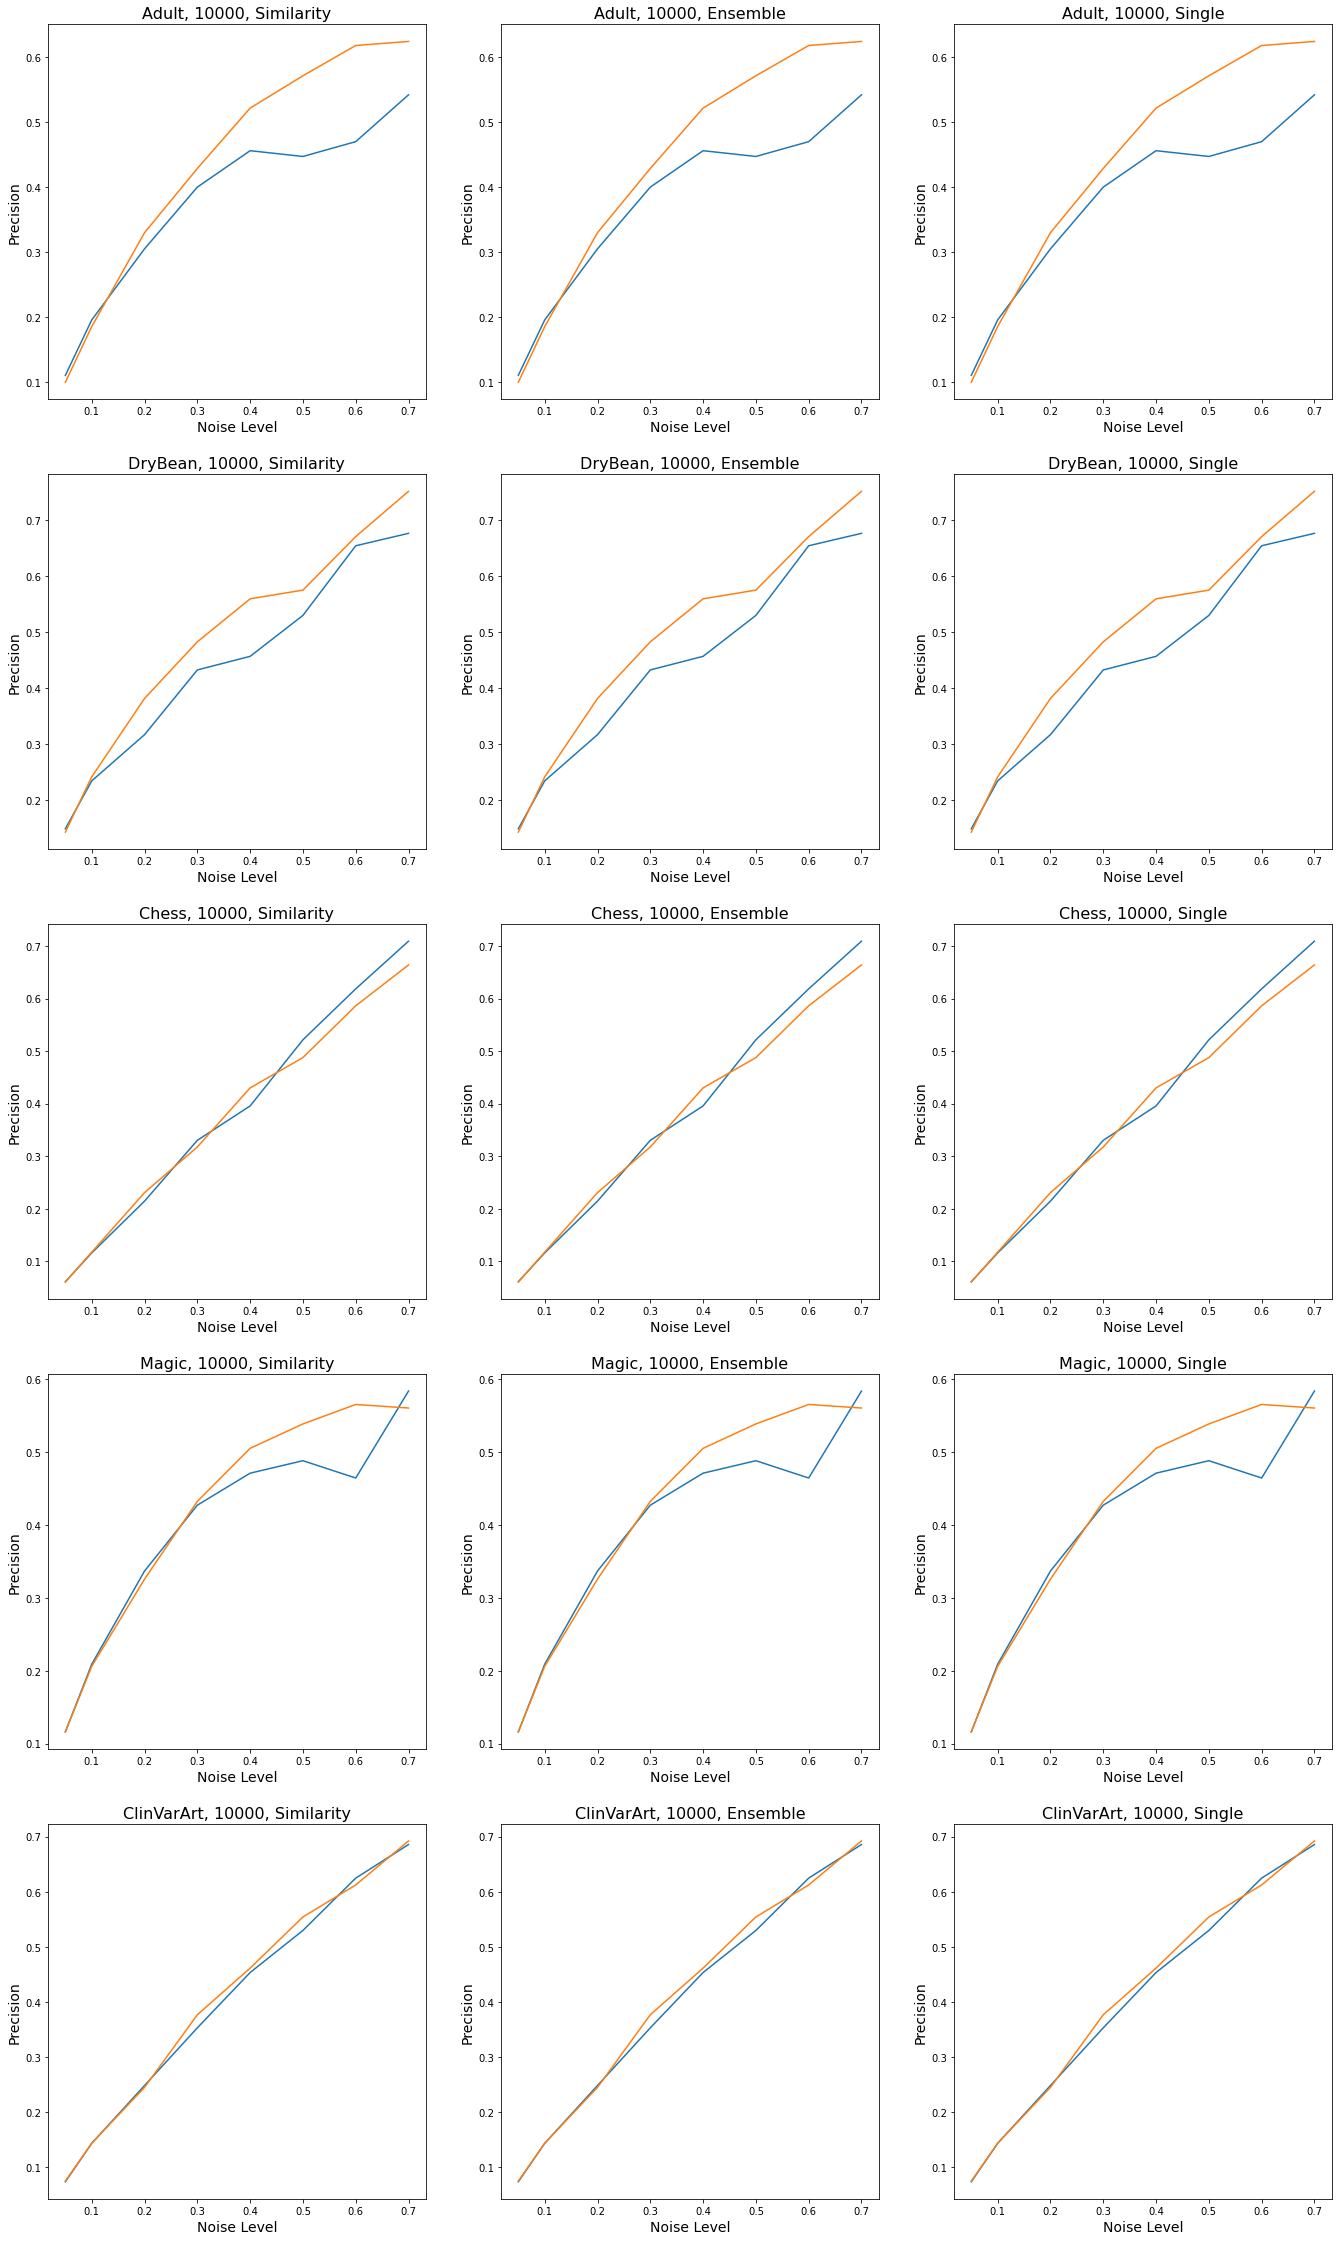

In [114]:
models = ["FKDN"]
models = ["KDN", "FKDN", "RkDN", "PD", "MCS", "IH", "RFD","CleanLab"]
models = ['C45votingFilter', 'CVCF', 'C45iteratedVotingFilter', 'IPF', 'CNN',
       'C45robustFilter', 'HARF', 'BBNR', 'ORBoostFilter', 'PRISM',
       'TomekLinks', 'PF', 'hybridRepairFilter', 'dynamicCF', 'EF', 'DROP1',
       'GE', 'DROP3', 'DROP2', 'edgeBoostFilter', 'INFFC', 'classifSF', 'AENN',
       'consensusSF', 'RNN', 'ModeFilter', 'ENG', 'saturationFilter', 'EWF']

#models = ['PD', 'MCS', 'IH', 'RkDN', 'FKDN', 'RFD', 'KDN', 'C45votingFilter', 
#'ORBoostFilter', 'CVCF', 'C45iteratedVotingFilter', 'IPF', 'CNN', 'C45robustFilter', 
#'HARF', 'BBNR']
NoiseTypes = ["Sym","Asym","Real"]
NoiseTypes = ["Sym"]
#NoiseType=''
variable = 'NoiseLevel'
#constant = ''
Score = 'Precision'
NoiseLevel = ''
allScores = dfs
DatasetSize = 10000
datasets = ["Adult","DryBean","Chess","Magic","ClinVarArt"]
n = len(datasets)
#n = 2

NoiseTypes = ["Sym","Asym"]


fig, axs = plt.subplots(n,3,figsize=(23,40))

for j,Dataset in enumerate(datasets[:n]):

    scores_raw = allScores[((allScores['Dataset'].str.contains(Dataset)) 
              # &(allScores['NoiseType'].str.contains(NoiseType)) 
              # &(allScores['Score'].str.contains(Score))
                &(allScores['DatasetSize']==DatasetSize))
              #  &(allScores['DatasetSize'].astype(str).str.len()==len(str(DatasetSize)))
            #  &(allScores['NoiseLevel'].astype(str).str.contains(str(NoiseLevel)))
                   ]
    print(len(scores))
    for noiseType in NoiseTypes:
        scores = scores_raw[scores_raw['NoiseType'] == noiseType]
        for i,group in enumerate(groups):  
                table = scores.groupby('NoiseLevel').mean().reset_index()

                if len(table) > 0:
                    axs[j,i].plot(table[variable],table[Score].astype(float),  label = noiseType)
                  #  plt.plot(table[variable],table[Score].astype(float),  label = model)
                 #   plt.legend()
                 #   plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

                    axs[j,i].set_title("{}, {}, {}".format(Dataset,str(DatasetSize), group), fontsize = 16 )
                #  plt.title("Dataset: {}, noise type: {}, group: {}".format(Dataset,noiseType,\
                #                                      group), fontsize = 16 )
                    axs[j,i].set_xlabel('Noise Level',fontsize = 14 )


                    axs[j,i].set_ylabel(Score,fontsize = 14 )
                    #plt.savefig('figures/'+Dataset+Score+noiseType+'.png',transparent=True)
                    plt.savefig('figures/test1.png',transparent=False,bbox_inches = 'tight'
                              #  ,pad_inches = 0
                               )


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
randn = np.random.randn
from pandas import *



#idx = Index(np.arange(1,11))
#df = DataFrame(randn(10, 5), index=idx, columns=['A', 'B', 'C', 'D', 'E'])
for Dataset in datasets[:]:
    print(Dataset)
    scores = allScores[((allScores['Dataset'].str.contains(Dataset)) 
               &(allScores['NoiseType'].str.contains(NoiseType)) 
              # &(allScores['Score'].str.contains(Score))
                &(allScores['DatasetSize'].astype(str).str.contains(str(DatasetSize),regex = True))
                &(allScores['DatasetSize'].astype(str).str.len()==len(str(DatasetSize)))
           #   &(allScores['NoiseLevel'].astype(str).str.contains(str(NoiseLevel)))
                   )]


    df = scores.pivot_table(values=Score, index='Model', columns='NoiseLevel', aggfunc='first')
    df= df.astype(float).round(4)
    vals = df.values# np.around(df.values,4)
    Min=vals.astype(float).min().min()
    Max=vals.astype(float).max().max()
    norm = plt.Normalize(Min-1, Max+1)
    #norm = plt.Normalize(0, 1)
    colours = plt.cm.hot(norm(vals))

    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])

    ytable=plt.table(cellText=vals, rowLabels=df.index, colLabels=df.columns, 
                        colWidths = [0.2]*vals.shape[1]
                      #  colHeights = [0.2]*vals.shape[0]
                        , loc='center', 
                        cellColours=colours)
    ytable.set_fontsize(34)
    ytable.scale(1, 4)
    plt.show()
    plt.show()


### Other

In [ ]:
path = "/fast/groups/ag_kircher/CADD/projects/bStatistic/github_repo_fork/scripts/pipeline/schemas/config.schema.yaml"
from snakemake.utils import validate
config = '..GRCh38/entireSet_config.yml'
#validate(config, schema=path)
models = {}
with open(config['ModelConfigSK'], 'r') as f:
    for line in f:
        if line.startswith('#'):
            continue
        fields=line.rstrip().split('\t')
        models[fields[0]]={'classifier': fields[1], 'args': fields[2]}


In [ ]:
import yaml
file = "/fast/users/nazaretl_c/work/MisLaProject/configs/test.json"
file = "../GRCh38/entireSet_config.yml"
with open(file, 'r') as j:
     config = yaml.safe_load(j.read())

In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression
import pandas as pd
#from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import joblib
model = str(snakemake.input)
dataset = str(snakemake.wildcards.modelNew)

#model = 'data/skmodels/entireSet/LR-Ce-01-wmo-i013.mod'
clf = joblib.load(model) 
pipe = make_pipeline(clf[1], clf[0])

name1 = dataset + '_simulation'
name2 = dataset + '_humanDerived'

chunksize = 10 ** 6
names = [name1, name2]
for name in names:
    i = 0
    file = 'data/GRCh38/'+name+'/imputation/SNV.csv.gz'
    for chunk in pd.read_csv(file, chunksize = chunksize,
                             nrows = 100,
                             sep = ',',  header = None):
        print(i, name)
        chunk = chunk.iloc[:,1:].to_numpy()
        labels = pd.Series(pipe.predict(chunk))

      #  labels.to_csv('data/predictedLabels/'+name+'.cvs', sep = '\t', 
       #               index = False, header = False, 
        #                 mode = 'a')
        i += 1


In [ ]:
with open(file, 'r') as j:
     config = json.loads(j.read())

In [ ]:
config['ModelConfigSK']

In [ ]:
with open(config['ModelConfigSK'], 'r') as f:
    print(f)

In [ ]:
#df = pd.read_csv('../data/predictedLabels/entireSet_humanDerived.cvs',header= None)
df = pd.read_csv('../data/predictedLabels/entireSet_simulation.cvs',header= None)

In [ ]:
df[0].value_counts(normalize = True)

In [ ]:
'file'